In [1]:
# Imports
import numpy as np
from pathlib import Path
import importlib 
import massimal.image_render
import massimal.hyspec_io
import matplotlib.pyplot as plt
import math
import massimal.pipeline

%matplotlib inline

In [2]:
# Paths
dataset_dir = Path('C:\\Users\\mha114\\Dropbox\\UiT\\Massimal\\Eksempel-datasett\\HSI\\20230830_Olberg')
calibration_dir = dataset_dir / 'calibration'
radiance_cailbration_file = next(calibration_dir.glob('*.icp'))
downwelling_calibration_file = next(calibration_dir.glob('*.dcp')) 
raw_image_dir = dataset_dir / '0_raw'
radiance_image_dir = dataset_dir / '1_radiance'
reflectance_image_dir = dataset_dir / '2_reflectance'
reflectance_image_dir.mkdir(exist_ok=True)

dataset_base_name = 'massimal_larvik_olbergholmen_202308301228-south1_hsi'
raw_image_paths = sorted(raw_image_dir.rglob('*.bil.hdr'))
radiance_image_paths = sorted(radiance_image_dir.glob('*.bip.hdr'))
irradiance_spec_paths = sorted(radiance_image_dir.glob('*.spec.hdr'))


In [3]:
# Parameters
rgb_ind = (30,78,126)

In [4]:
rad_im,rad_wl,rad_meta = massimal.pipeline.read_envi(radiance_image_paths[0])
irrad_spec, irrad_wl, irrad_meta = massimal.pipeline.read_envi(irradiance_spec_paths[0])

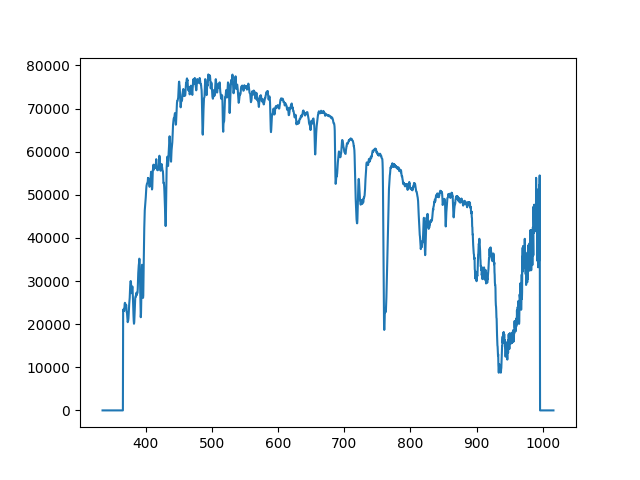

In [5]:
%matplotlib widget
plt.figure()
plt.plot(irrad_wl,np.squeeze(irrad_spec))

In [6]:
importlib.reload(massimal.pipeline)
rflp = massimal.pipeline.ReflectanceConverter()

In [13]:
# refl_im, refl_wl, irrad_resamp = rflp.convert_radiance_image_to_reflectance(
#     rad_im,rad_wl,irrad_spec,irrad_wl,smooth_with_savitsky_golay=True)
refl_im, refl_wl, irrad_resamp = rflp.convert_radiance_image_to_reflectance(
    rad_im,rad_wl,irrad_spec,irrad_wl,smooth_with_savitsky_golay=False)

In [14]:
wl_str = massimal.pipeline.wavelength_array_to_header_string(refl_wl)
refl_meta = rad_meta
refl_meta['wavelength'] = wl_str
# massimal.pipeline.save_envi(reflectance_image_dir / 'test.bip.hdr',refl_im.astype(np.float32),refl_meta)
massimal.pipeline.save_envi(reflectance_image_dir / 'test_no_smoothing.bip.hdr',refl_im.astype(np.float32),refl_meta)

In [9]:
tmp = math.pi*(refl_im[0,0,:].astype(np.float32) / irrad_resamp.astype(np.float32))
print(tmp.dtype)

float32


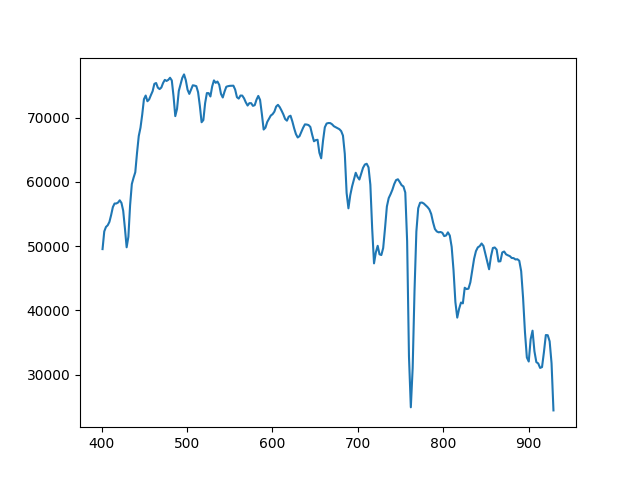

In [10]:
%matplotlib widget
plt.figure()
plt.plot(refl_wl,np.squeeze(irrad_resamp))

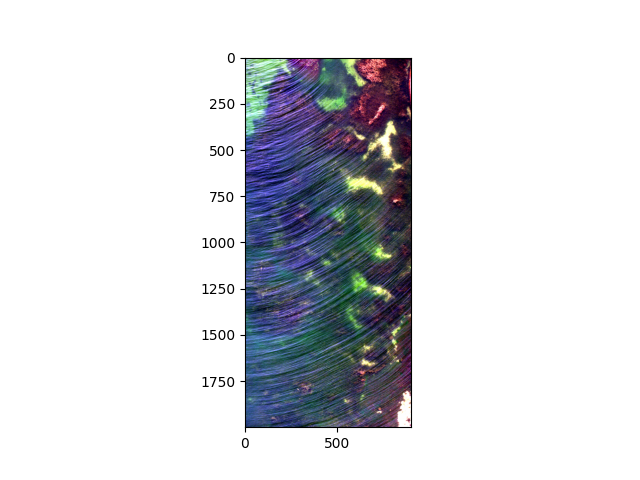

In [11]:
plt.figure()
rgb_ind = [massimal.pipeline.closest_wl_index(refl_wl,rgb_wl) for rgb_wl in (650,550,450)]
plt.imshow(massimal.image_render.percentile_stretch(refl_im[:,:,rgb_ind]))

(400.0, 950.0)

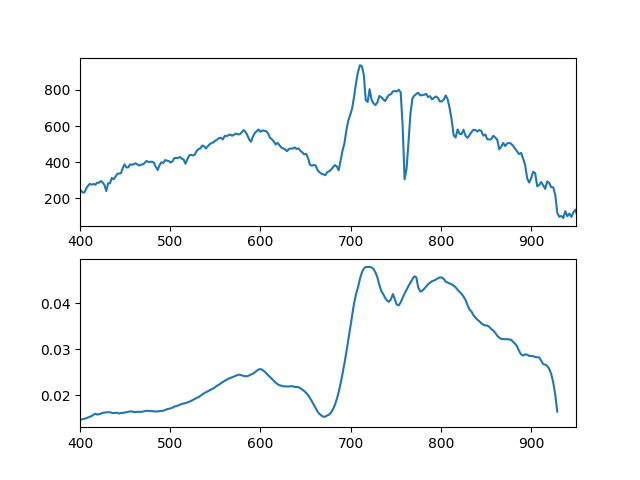

In [12]:
%matplotlib widget 
fig,ax = plt.subplots(nrows=2)
ax[0].plot(rad_wl,np.mean(rad_im[40:80,700,:],axis=0))
ax[0].set_xlim((400,950))
ax[1].plot(refl_wl,np.mean(refl_im[40:80,700,:],axis=0))
ax[1].set_xlim((400,950))